<a href="https://colab.research.google.com/github/ElviraKonovalov/soen471-bigData/blob/main/elviras_new_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.under_sampling import NearMiss 

In [70]:
# file = 'data/clean_data_hot-one.csv'
file = 'clean_data_hot-one.csv'
df=  pd.read_csv(file, sep=',')
df

,Unnamed: 0,ACCLASS,AG_DRIV,ALCOHOL,AUTOMOBILE,CYCLIST,DATE,DISABILITY,EMERG_VEH,HOOD_ID,...,PASSENGER,PEDESTRIAN,RDSFCOND,REDLIGHT,ROAD_CLASS,SPEEDING,TRAFFCTL,TRSN_CITY_VEH,TRUCK,VISIBILITY
0,2,1,1,0,1,0,3,0,0,131,...,0,0,0,1,4,0,2,0,0,0
1,4,1,0,1,1,0,3,0,0,138,...,0,1,0,0,4,0,1,0,0,0
2,7,0,1,1,1,0,3,0,0,81,...,0,1,0,0,4,0,2,0,0,0
3,9,1,0,0,1,0,3,0,0,6,...,0,1,0,0,4,0,2,0,0,0
4,14,0,1,0,1,0,3,0,0,116,...,1,0,0,1,4,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8081,16852,0,1,0,1,0,8,0,0,51,...,0,0,0,0,4,0,2,0,0,0
8082,16853,0,1,0,1,0,8,0,0,51,...,0,0,0,0,4,0,2,0,0,0
8083,16856,0,1,0,1,0,9,0,0,138,...,1,0,0,0,4,0,2,0,0,0
8084,16857,0,1,0,1,0,9,0,0,138,...,1,0,0,0,4,0,2,0,0,0


In [62]:
y = df['ACCLASS']

df = df.drop(columns=['ACCLASS', 'Unnamed: 0'])
X = df

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Random Forests

In [34]:
feature_names = list(X.columns) # get feature names

In [11]:
# find best parameters for a random forest and train using best found estimator
params = {
    'n_estimators': [100, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 5, 10, 13],
    'min_samples_leaf': [1, 2, 5, 8, 13]
}

forest = GridSearchCV(RandomForestClassifier(random_state=0), params)
forest.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 5, 8, 13],
                         'min_samples_split': [2, 4, 5, 10, 13],
                         'n_estimators': [100, 500, 1000]})

In [12]:
forest.best_estimator_ # params of best estimator

RandomForestClassifier(n_estimators=500, random_state=0)

## Feature importances with a forest of trees
### Feature importance based on mean decrease in impurity

In [13]:
start_time = time.time()
importances = forest.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.best_estimator_.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.164 seconds


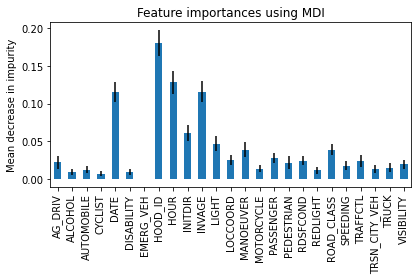

In [14]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

###  Feature importance based on feature permutation

In [15]:
start_time = time.time()
result = permutation_importance(forest.best_estimator_, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 72.575 seconds


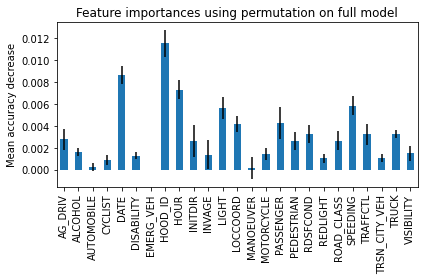

In [16]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


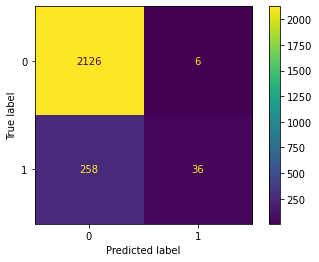

In [18]:
plot_confusion_matrix(forest.best_estimator_, X_test, y_test)  
plt.show();

In [29]:
# evaluate model
import warnings
warnings.filterwarnings('ignore')

y_pred = forest.best_estimator_.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("MODEL", "ACCURACY", "PRECISION", "RECALL", "F1"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:} {2:10} {3:10} {4:10}".format("random forest", accuracy, precision, recall, f1))

----------------  ---------  ---------  ---------  ---------
MODEL             ACCURACY   PRECISION  RECALL     F1
----------------  ---------  ---------  ---------  ---------
random forest     89.12      88.76      89.12      85.34


# Neural network

In [35]:
params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
mlp = MLPClassifier(max_iter=100)
nn = GridSearchCV(mlp, params, n_jobs=-1, cv=3)
nn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [36]:
nn.best_estimator_ # params of best estimator

MLPClassifier(alpha=0.05, hidden_layer_sizes=(50, 100, 50), max_iter=100,
              solver='sgd')

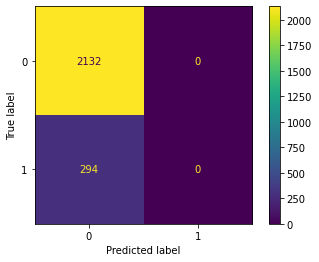

In [37]:
y_pred = nn.best_estimator_.predict(X_test)
plot_confusion_matrix(nn.best_estimator_, X_test, y_test)  
plt.show();

In [39]:
# evaluate model
import warnings
warnings.filterwarnings('ignore')

y_pred = nn.best_estimator_.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("MODEL", "ACCURACY", "PRECISION", "RECALL", "F1"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:} {2:10} {3:10} {4:10}".format("neural netwrok", accuracy, precision, recall, f1))

----------------  ---------  ---------  ---------  ---------
MODEL             ACCURACY   PRECISION  RECALL     F1
----------------  ---------  ---------  ---------  ---------
neural netwrok    87.88      77.23      87.88      82.21


## Undersampling

In [63]:
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
X, y = undersample.fit_resample(X, y)

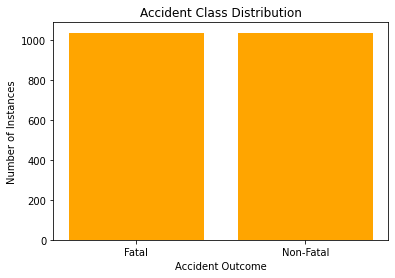

In [51]:
class_counts = y.value_counts()
classes = ['Fatal','Non-Fatal']
class_instance_count = class_counts.values
plt.bar(classes,class_instance_count, color='orange')
plt.title('Accident Class Distribution')
plt.xlabel('Accident Outcome')
plt.ylabel('Number of Instances');

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# find best parameters for a random forest and train using best found estimator
params = {
    'n_estimators': [100, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 5, 10, 13],
    'min_samples_leaf': [1, 2, 5, 8, 13]
}

forest = GridSearchCV(RandomForestClassifier(random_state=0), params)
forest.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 5, 8, 13],
                         'min_samples_split': [2, 4, 5, 10, 13],
                         'n_estimators': [100, 500, 1000]})

In [54]:
forest.best_estimator_ # params of best estimator

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

In [55]:
start_time = time.time()
importances = forest.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.best_estimator_.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.139 seconds


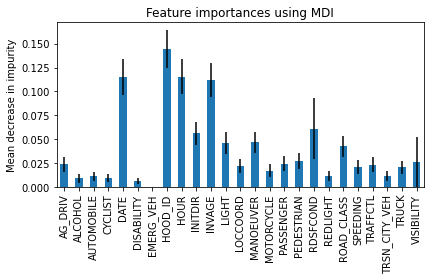

In [56]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [57]:
start_time = time.time()
result = permutation_importance(forest.best_estimator_, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 41.955 seconds


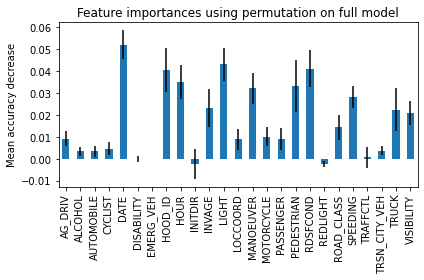

In [58]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

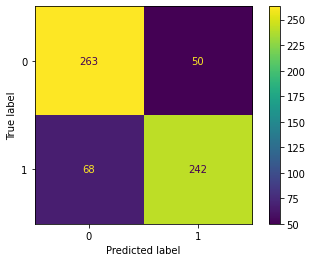

In [59]:
plot_confusion_matrix(forest.best_estimator_, X_test, y_test)  
plt.show();

In [60]:
# evaluate model
import warnings
warnings.filterwarnings('ignore')

y_pred = forest.best_estimator_.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("MODEL", "ACCURACY", "PRECISION", "RECALL", "F1"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:} {2:10} {3:10} {4:10}".format("random forest", accuracy, precision, recall, f1))

----------------  ---------  ---------  ---------  ---------
MODEL             ACCURACY   PRECISION  RECALL     F1
----------------  ---------  ---------  ---------  ---------
random forest     81.06      81.16      81.06      81.04


In [65]:
params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
mlp = MLPClassifier(max_iter=100)
nn = GridSearchCV(mlp, params, n_jobs=-1, cv=3)
nn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [66]:
nn.best_estimator_ # params of best estimator

MLPClassifier(activation='tanh', alpha=0.05, max_iter=100)

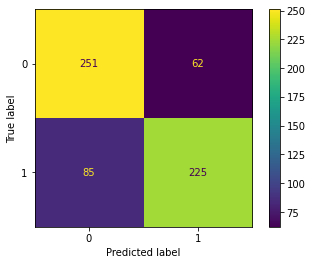

In [67]:
y_pred = nn.best_estimator_.predict(X_test)
plot_confusion_matrix(nn.best_estimator_, X_test, y_test)  
plt.show();

In [68]:
# evaluate model
import warnings
warnings.filterwarnings('ignore')

y_pred = nn.best_estimator_.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("MODEL", "ACCURACY", "PRECISION", "RECALL", "F1"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:} {2:10} {3:10} {4:10}".format("neural netwrok", accuracy, precision, recall, f1))

----------------  ---------  ---------  ---------  ---------
MODEL             ACCURACY   PRECISION  RECALL     F1
----------------  ---------  ---------  ---------  ---------
neural netwrok    76.4      76.54       76.4      76.37


In [72]:
y = df['ACCLASS']

df = df.drop(columns=['ACCLASS', 'Unnamed: 0', 'AG_DRIV', 'ALCOHOL', 'AUTOMOBILE', 'CYCLIST', 'DISABILITY', 'EMERG_VEH', 'INITDIR', 'LOCCOORD', 'MOTORCYCLE', 'PASSENGER', 'REDLIGHT', 'TRAFFCTL', 'TRSN_CITY_VEH'])
X = df

In [73]:
X # 12 features are kept

,DATE,HOOD_ID,HOUR,INVAGE,LIGHT,MANOEUVER,PEDESTRIAN,RDSFCOND,ROAD_CLASS,SPEEDING,TRUCK,VISIBILITY
0,3,131,9,7,4,14,0,0,4,0,0,0
1,3,138,2,3,0,2,1,0,4,0,0,0
2,3,81,19,4,0,13,1,0,4,0,0,0
3,3,6,15,6,4,2,1,0,4,0,0,0
4,3,116,9,3,4,2,0,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8081,8,51,14,13,4,13,0,0,4,0,0,0
8082,8,51,14,3,4,2,0,0,4,0,0,0
8083,9,138,12,11,4,13,0,0,4,0,0,0
8084,9,138,12,4,4,2,0,0,4,0,0,0


In [74]:
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
X, y = undersample.fit_resample(X, y)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
# find best parameters for a random forest and train using best found estimator
params = {
    'n_estimators': [100, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 5, 10, 13],
    'min_samples_leaf': [1, 2, 5, 8, 13]
}

forest = GridSearchCV(RandomForestClassifier(random_state=0), params)
forest.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 5, 8, 13],
                         'min_samples_split': [2, 4, 5, 10, 13],
                         'n_estimators': [100, 500, 1000]})

In [77]:
forest.best_estimator_ # params of best estimator

RandomForestClassifier(min_samples_split=4, n_estimators=1000, random_state=0)

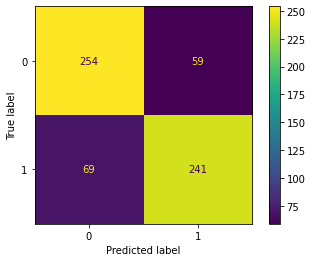

In [78]:
plot_confusion_matrix(forest.best_estimator_, X_test, y_test)  
plt.show();

In [79]:
# evaluate model
import warnings
warnings.filterwarnings('ignore')

y_pred = forest.best_estimator_.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("MODEL", "ACCURACY", "PRECISION", "RECALL", "F1"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:} {2:10} {3:10} {4:10}".format("random forest", accuracy, precision, recall, f1))

----------------  ---------  ---------  ---------  ---------
MODEL             ACCURACY   PRECISION  RECALL     F1
----------------  ---------  ---------  ---------  ---------
random forest     79.45      79.48      79.45      79.45
